# Random Forest implementation

Frist I have loaded locally the preprocessed dataset so that it is ready for implementation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


Installing shap to help us with visualization which will be needed

In [4]:
pip install shap


Applying smote and balancing the dataset. We applied Smote to the training data to balance the class distribution by generating synthetic samples for the minority class.

In [5]:
!pip install imbalanced-learn --quiet

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd


df = pd.read_csv("preprocessed_dataset.csv")


target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


X_train = X_train_balanced
y_train = y_train_balanced


Now we start with the different hyperparameters of Random Forest which we will adjust and test to optimize the model's performance

Test #1

 n_estimators=200 max_depth=None min_samples_split=2 min_samples_leaf=2 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17109   533]
 [ 4068   396]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17642
           1       0.43      0.09      0.15      4464

    accuracy                           0.79     22106
   macro avg       0.62      0.53      0.51     22106
weighted avg       0.73      0.79      0.73     22106

Accuracy on Test Set: 0.7919

Best Parameters (manually set): {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2}
Cross-Validation Accuracy Scores: [0.78707138 0.78660936 0.77606876 0.7868808  0.79796426]
Mean CV Accuracy: 0.7869


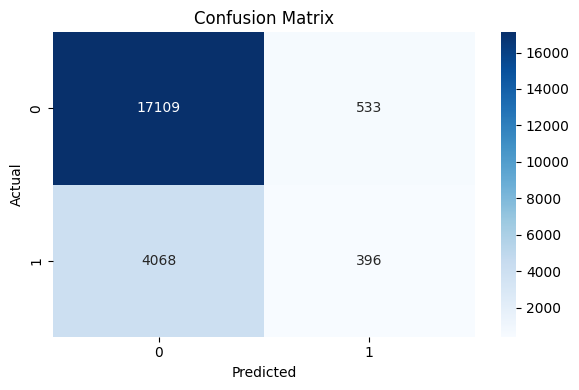

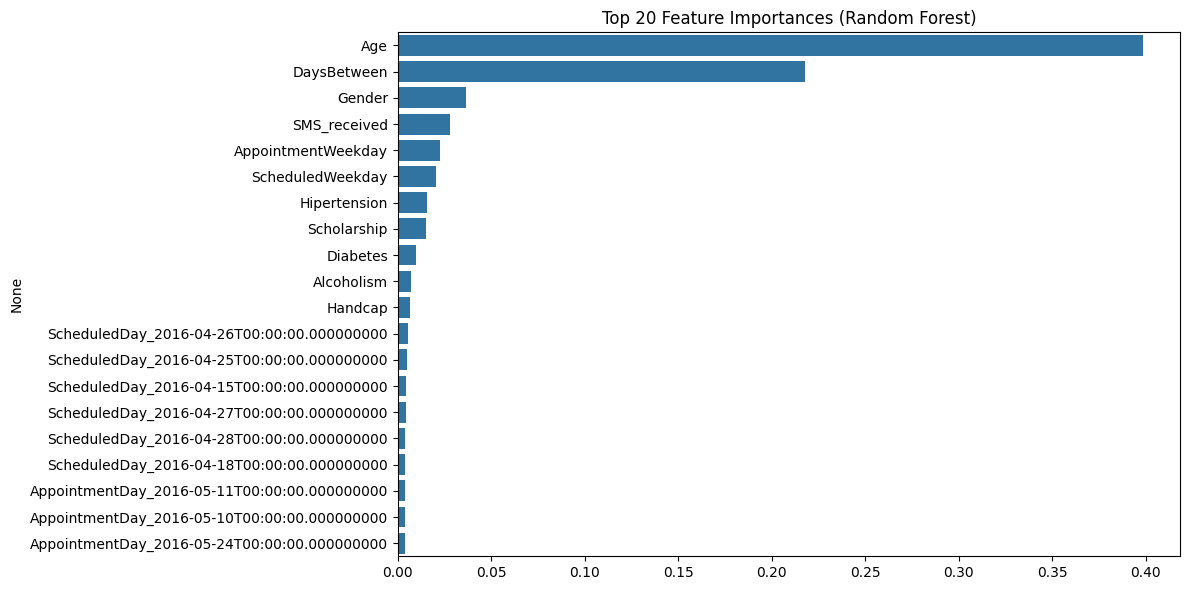

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap

df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()



Test #2

 n_estimators=100 max_depth=None min_samples_split=2 min_samples_leaf=1 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[15467  2175]
 [ 3347  1117]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     17642
           1       0.34      0.25      0.29      4464

    accuracy                           0.75     22106
   macro avg       0.58      0.56      0.57     22106
weighted avg       0.72      0.75      0.74     22106

Accuracy on Test Set: 0.7502

Best Parameters (manually set): {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Cross-Validation Accuracy Scores: [0.74242287 0.73951595 0.73282063 0.75064465 0.77683782]
Mean CV Accuracy: 0.7484


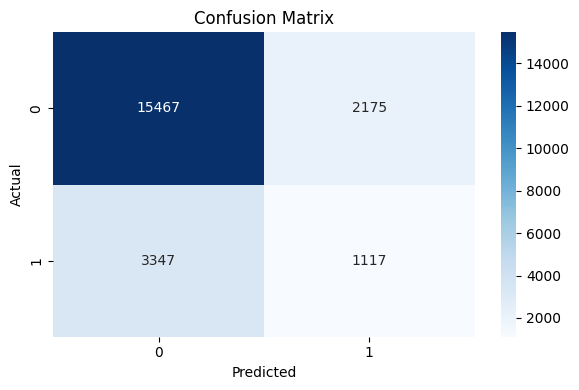

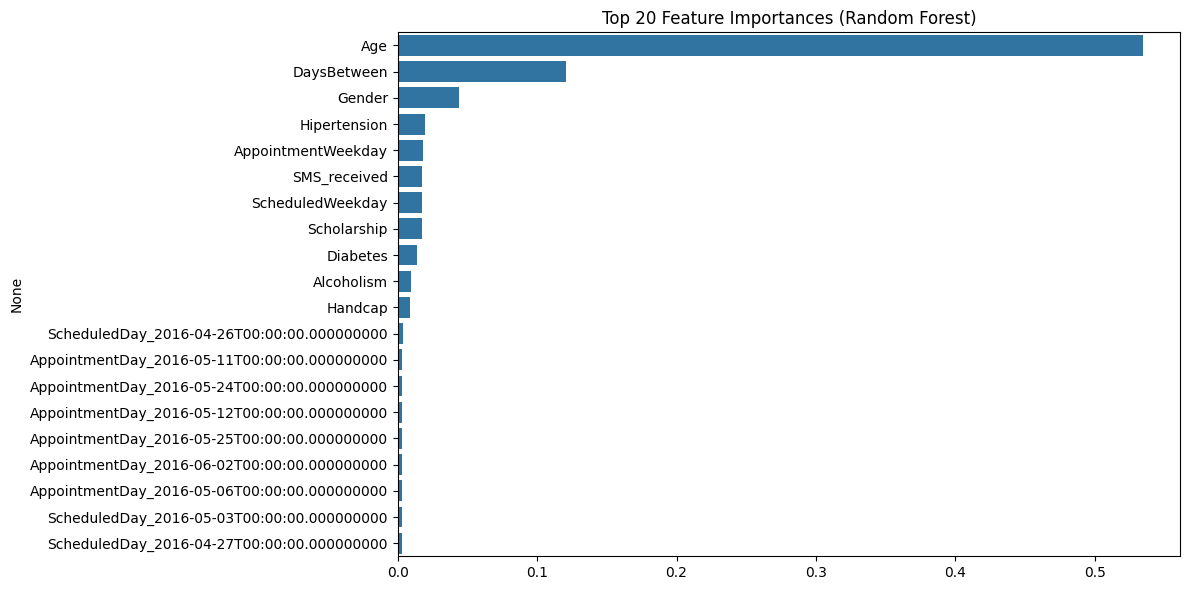

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #3

n_estimators=200 max_depth=10 min_samples_split=2 min_samples_leaf=2 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17642     0]
 [ 4464     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Accuracy on Test Set: 0.7981

Best Parameters (manually set): {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Accuracy Scores: [0.79806387 0.79809998 0.79805474 0.79805474 0.79805474]
Mean CV Accuracy: 0.7981


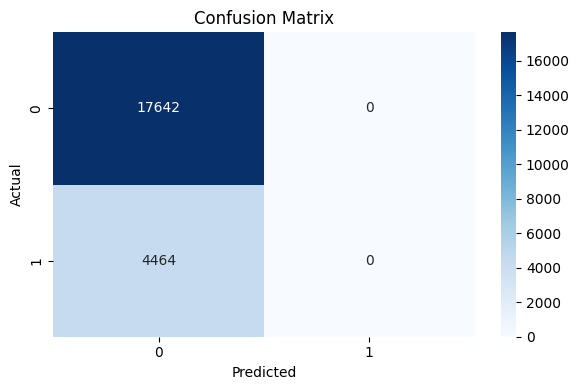

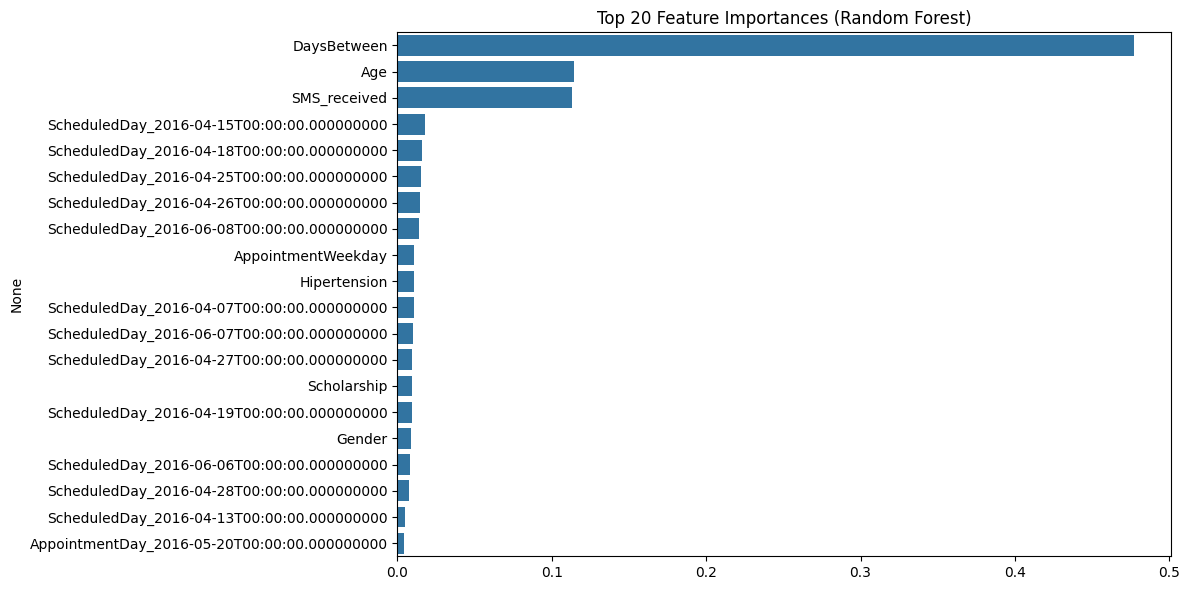

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #4

n_estimators=150 max_depth=20 min_samples_split=5 min_samples_leaf=3 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17629    13]
 [ 4445    19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.59      0.00      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.70      0.50      0.45     22106
weighted avg       0.76      0.80      0.71     22106

Accuracy on Test Set: 0.7983

Best Parameters (manually set): {'n_estimators': 150, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3}
Cross-Validation Accuracy Scores: [0.79761151 0.79805474 0.79583805 0.79805474 0.79805474]
Mean CV Accuracy: 0.7975


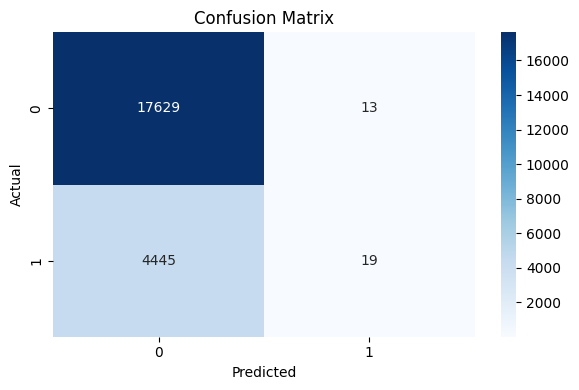

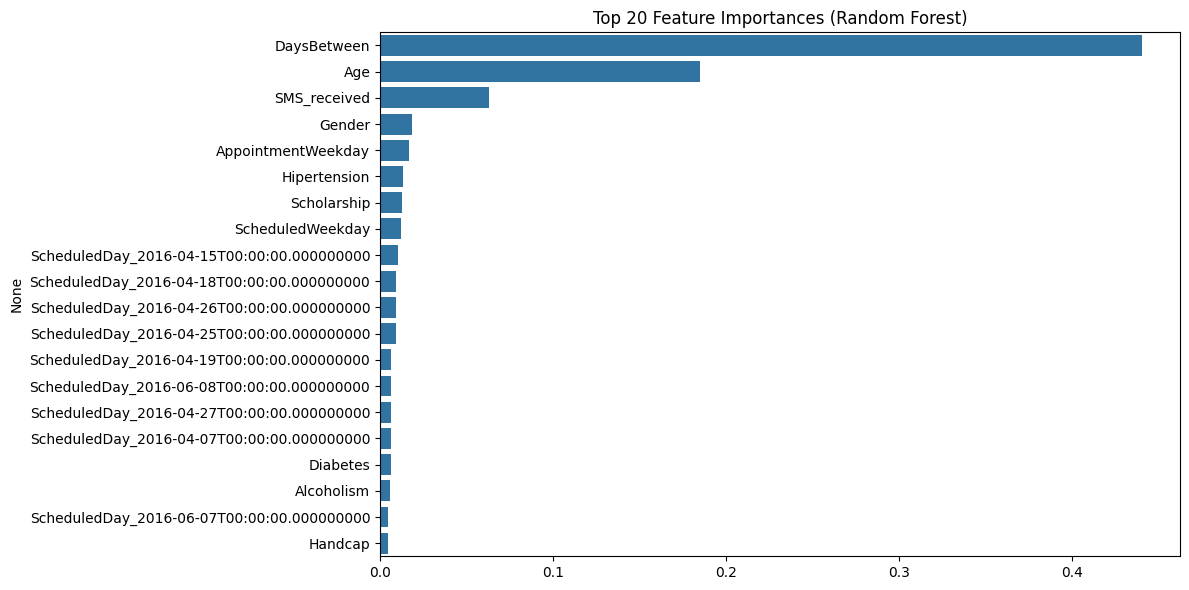

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 150,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 3
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #5

n_estimators=100 max_depth=10 min_samples_split=2 min_samples_leaf=4 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17642     0]
 [ 4464     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Accuracy on Test Set: 0.7981

Best Parameters (manually set): {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Accuracy Scores: [0.79806387 0.79809998 0.79805474 0.79805474 0.79805474]
Mean CV Accuracy: 0.7981


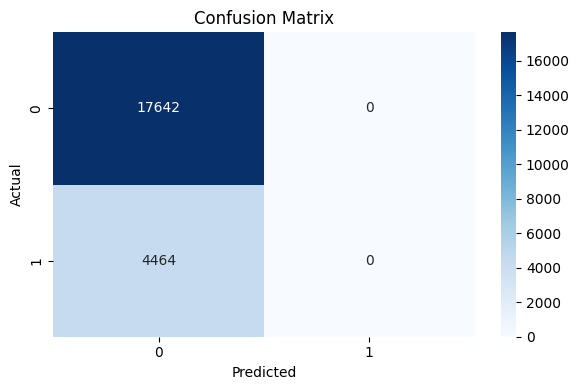

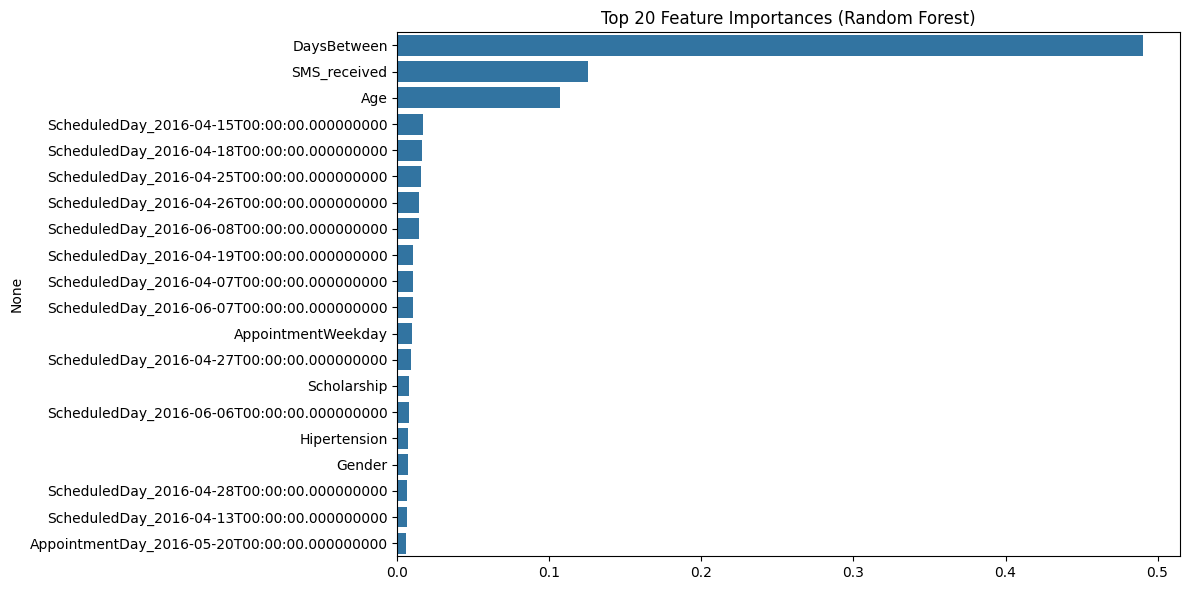

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 4
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #6

n_estimators=250 max_depth=30 min_samples_split=2 min_samples_leaf=5 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17621    21]
 [ 4425    39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.65      0.01      0.02      4464

    accuracy                           0.80     22106
   macro avg       0.72      0.50      0.45     22106
weighted avg       0.77      0.80      0.71     22106

Accuracy on Test Set: 0.7989

Best Parameters (manually set): {'n_estimators': 250, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 5}
Cross-Validation Accuracy Scores: [0.79770198 0.79751188 0.7946166  0.79791902 0.79805474]
Mean CV Accuracy: 0.7972


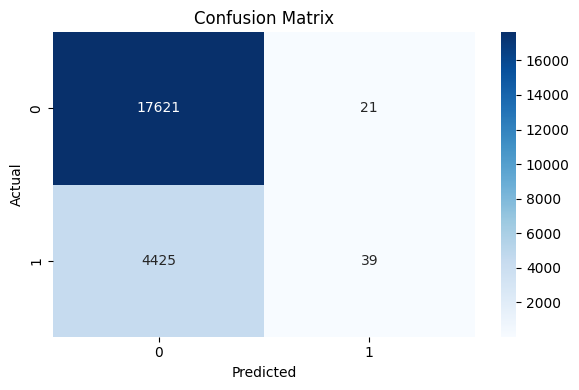

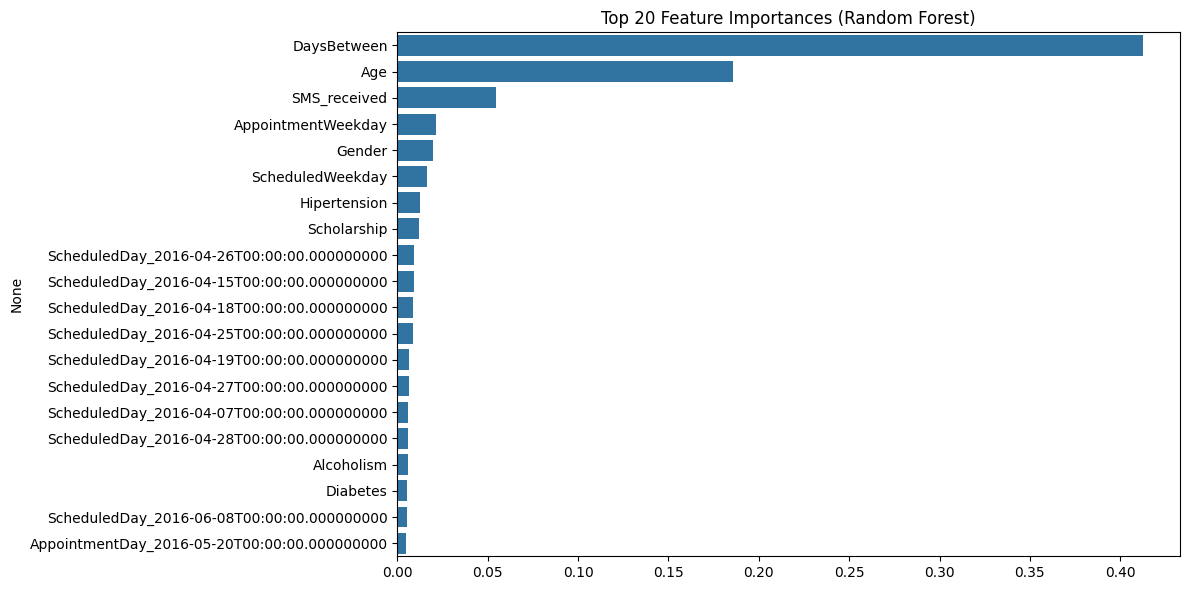

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 250,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 5
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #7

n_estimators=300	max_depth=None	min_samples_split=5	min_samples_leaf=2	class_weight= balanced


Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17154   488]
 [ 4101   363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17642
           1       0.43      0.08      0.14      4464

    accuracy                           0.79     22106
   macro avg       0.62      0.53      0.51     22106
weighted avg       0.73      0.79      0.73     22106

Accuracy on Test Set: 0.7924

Best Parameters (manually set): {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2}
Cross-Validation Accuracy Scores: [0.78765946 0.78764985 0.77661163 0.78909749 0.79787378]
Mean CV Accuracy: 0.7878


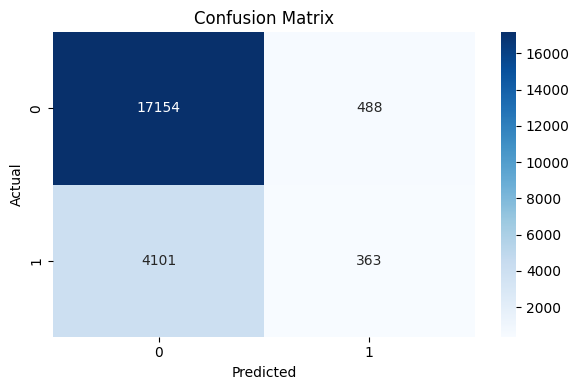

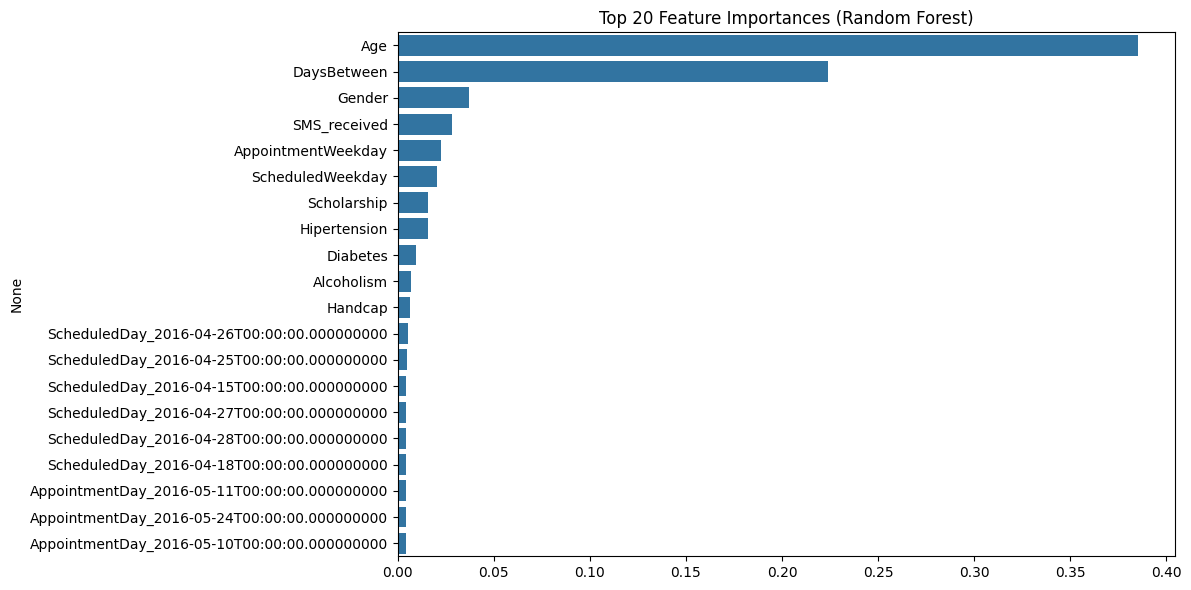

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #8

n_estimators=200	max_depth=20	min_samples_split=10	min_samples_leaf=1	class_weight= None

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17608    34]
 [ 4421    43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.56      0.01      0.02      4464

    accuracy                           0.80     22106
   macro avg       0.68      0.50      0.45     22106
weighted avg       0.75      0.80      0.71     22106

Accuracy on Test Set: 0.7985

Best Parameters (manually set): {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1}
Cross-Validation Accuracy Scores: [0.79770198 0.7968333  0.7946166  0.79606424 0.79805474]
Mean CV Accuracy: 0.7967


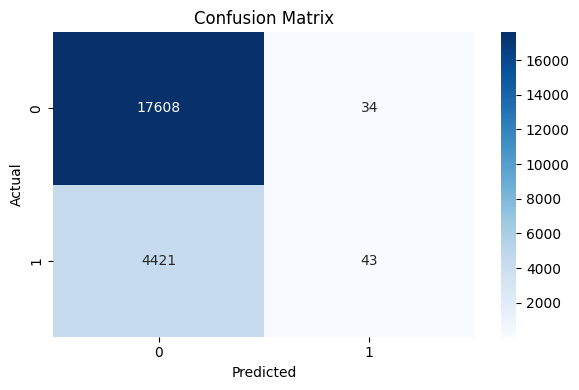

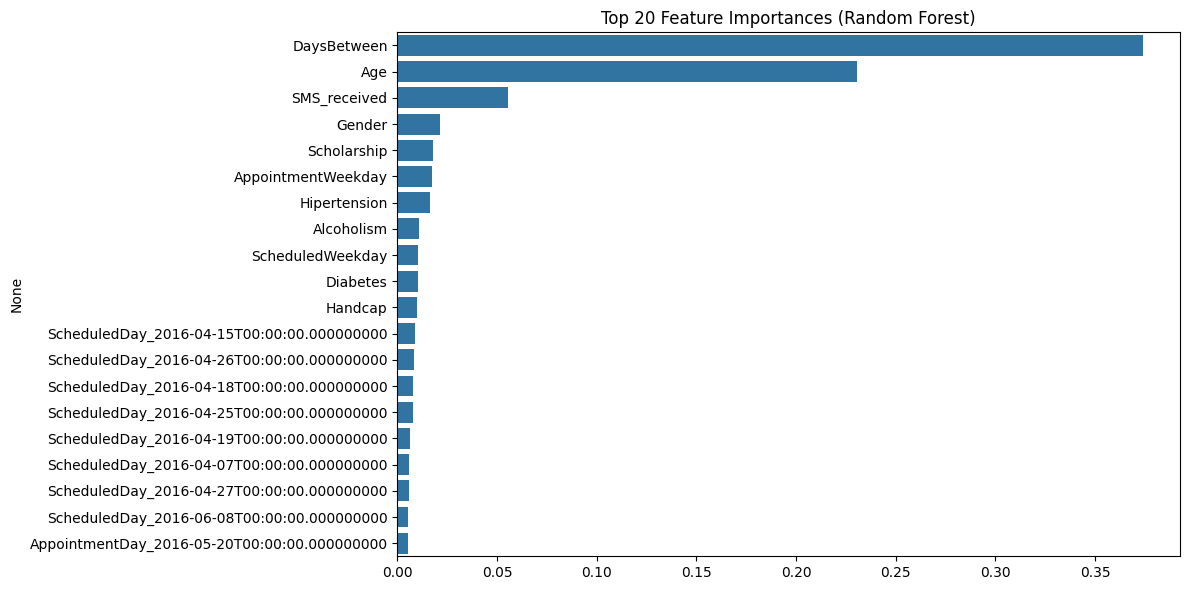

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


Test #9

 n_estimators=150 max_depth=30 min_samples_split=5 min_samples_leaf=2 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17535   107]
 [ 4361   103]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.49      0.02      0.04      4464

    accuracy                           0.80     22106
   macro avg       0.65      0.51      0.47     22106
weighted avg       0.74      0.80      0.72     22106

Accuracy on Test Set: 0.7979

Best Parameters (manually set): {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 2}
Cross-Validation Accuracy Scores: [0.7961187  0.79547614 0.78796652 0.7952047  0.7980095 ]
Mean CV Accuracy: 0.7946


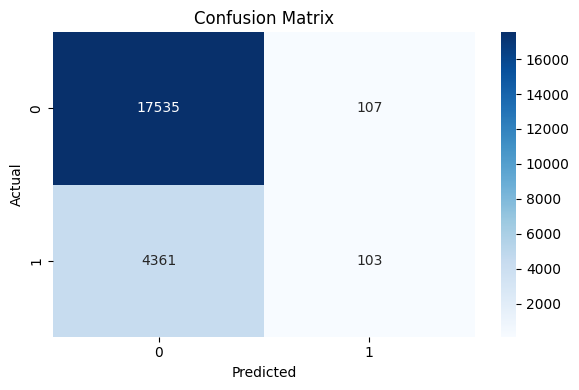

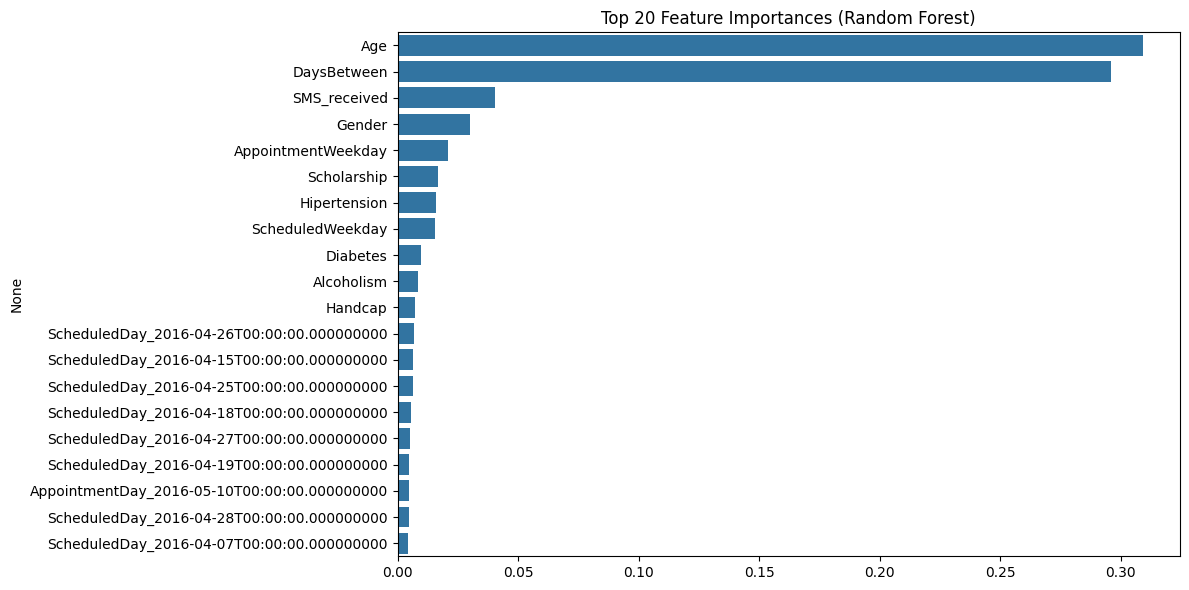

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 150,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #10

 n_estimators=100 max_depth=50 min_samples_split=2 min_samples_leaf=3 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17476   166]
 [ 4303   161]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.49      0.04      0.07      4464

    accuracy                           0.80     22106
   macro avg       0.65      0.51      0.48     22106
weighted avg       0.74      0.80      0.72     22106

Accuracy on Test Set: 0.7978

Best Parameters (manually set): {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 2, 'min_samples_leaf': 3}
Cross-Validation Accuracy Scores: [0.79598299 0.79574757 0.78579507 0.79357611 0.79805474]
Mean CV Accuracy: 0.7938


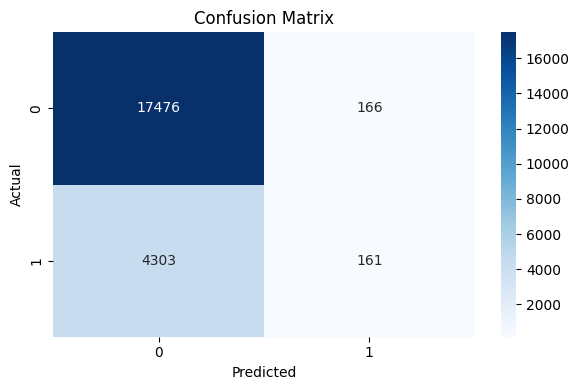

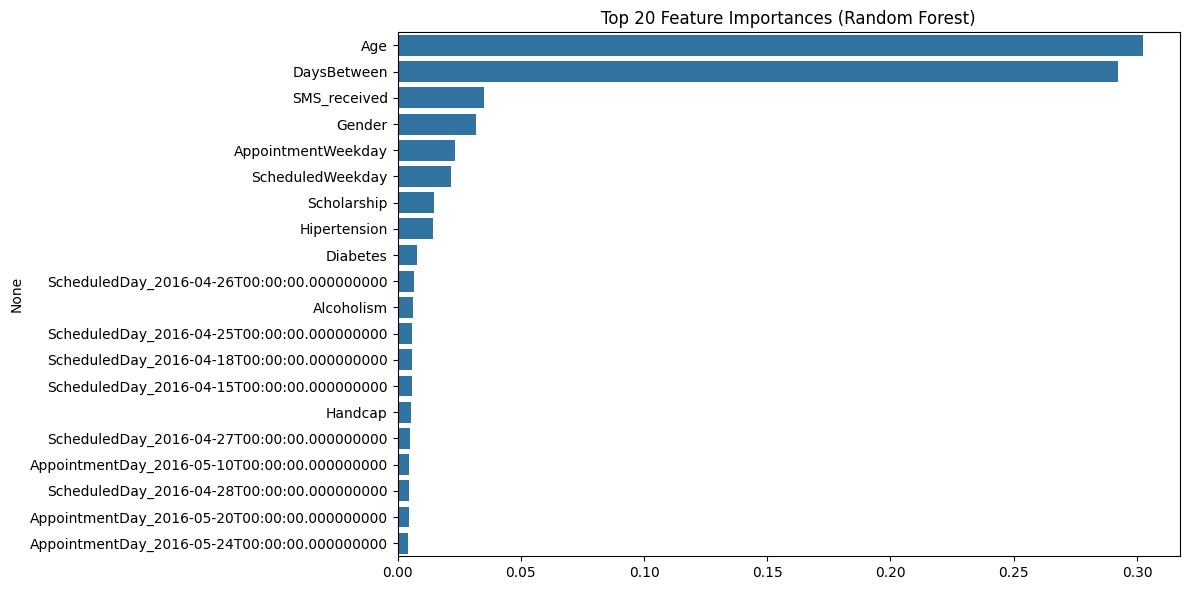

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 100,
    'max_depth': 50,
    'min_samples_split': 2,
    'min_samples_leaf': 3
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #11

n_estimators=250 max_depth=10 min_samples_split=10 min_samples_leaf=4 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17642     0]
 [ 4464     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Accuracy on Test Set: 0.7981

Best Parameters (manually set): {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Accuracy Scores: [0.79806387 0.79809998 0.79805474 0.79805474 0.79805474]
Mean CV Accuracy: 0.7981


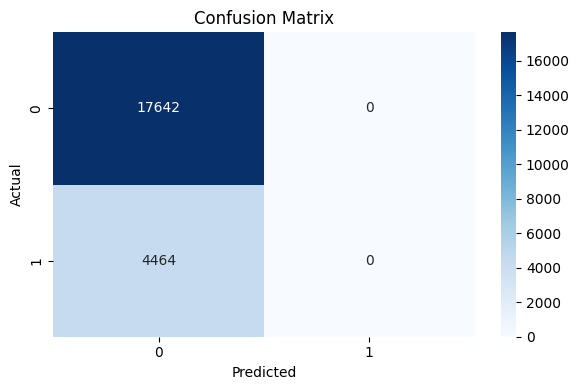

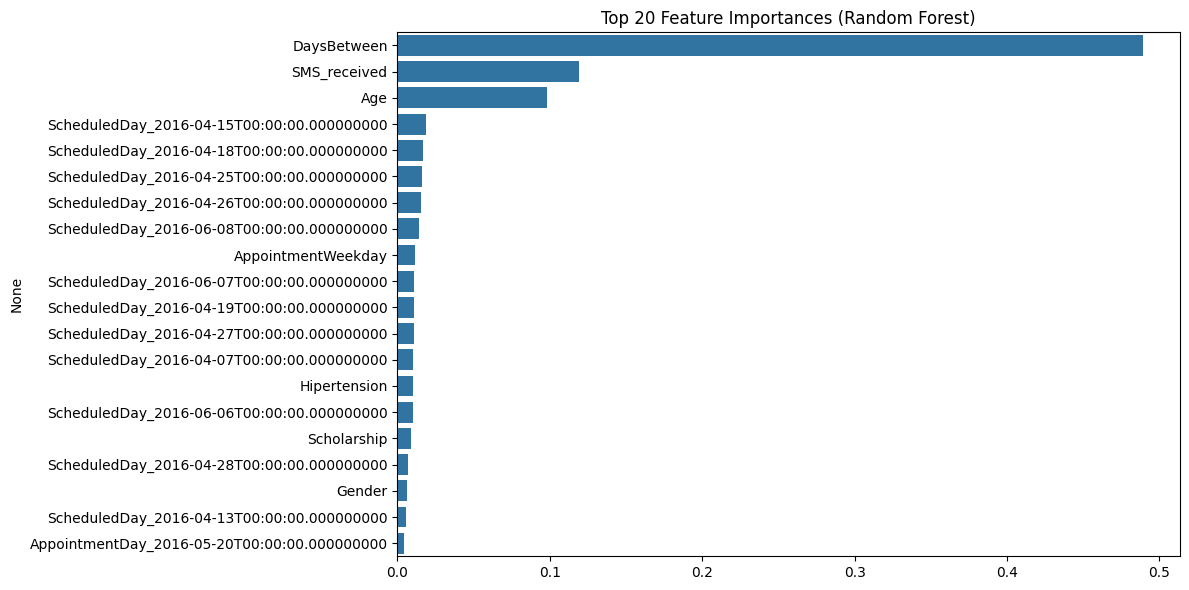

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 250,
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 4
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #12

n_estimators=300 max_depth=20 min_samples_split=5 min_samples_leaf=5 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17638     4]
 [ 4456     8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.67      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.73      0.50      0.45     22106
weighted avg       0.77      0.80      0.71     22106

Accuracy on Test Set: 0.7982

Best Parameters (manually set): {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 5}
Cross-Validation Accuracy Scores: [0.79801864 0.79782855 0.79696901 0.79805474 0.79805474]
Mean CV Accuracy: 0.7978


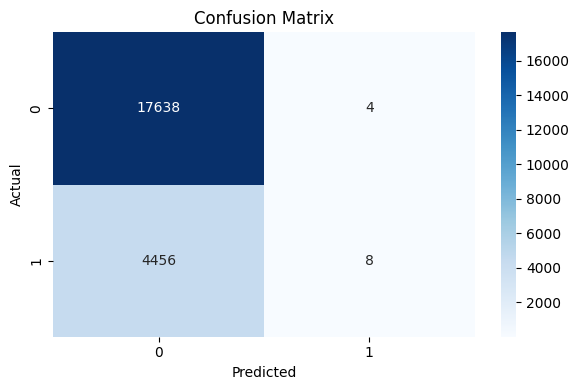

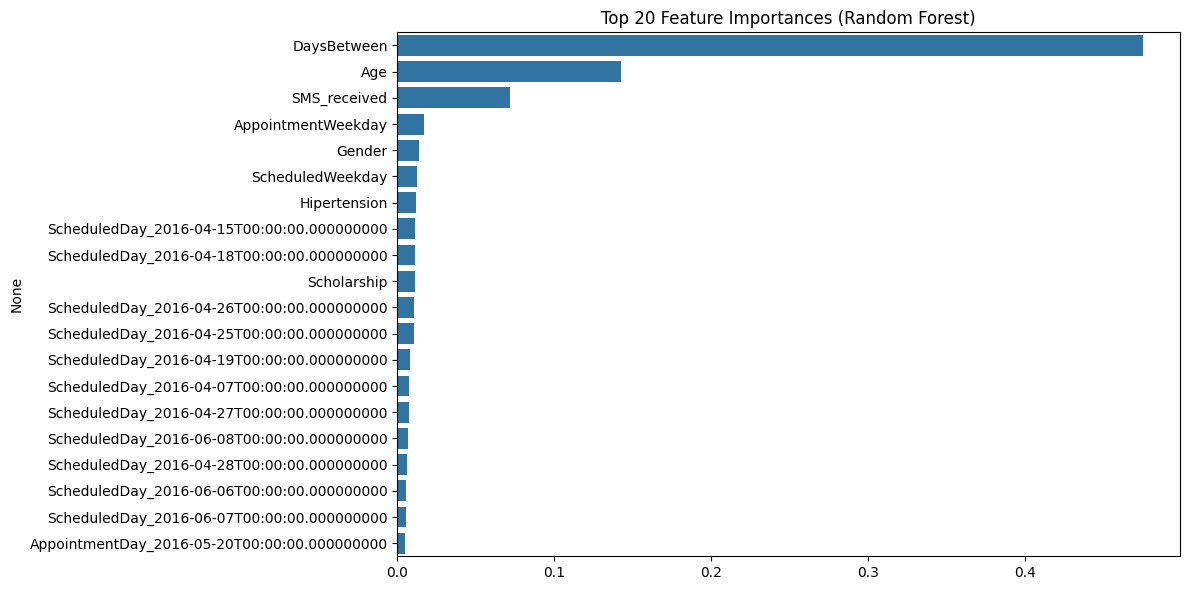

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 300,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 5
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #13

 n_estimators=200 max_depth=None min_samples_split=2 min_samples_leaf=1 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[15472  2170]
 [ 3335  1129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     17642
           1       0.34      0.25      0.29      4464

    accuracy                           0.75     22106
   macro avg       0.58      0.56      0.57     22106
weighted avg       0.73      0.75      0.74     22106

Accuracy on Test Set: 0.7510

Best Parameters (manually set): {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Cross-Validation Accuracy Scores: [0.74427757 0.73992309 0.73268491 0.75032798 0.77760688]
Mean CV Accuracy: 0.7490


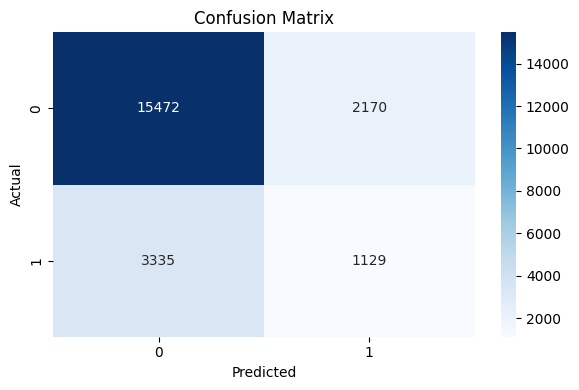

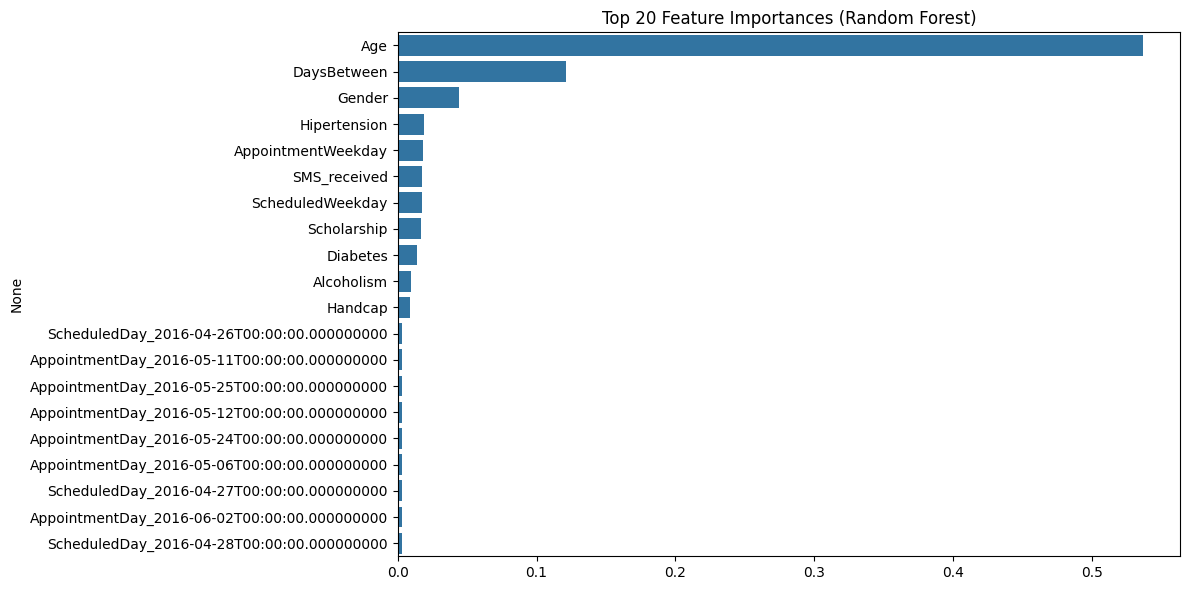

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #14

n_estimators=150 max_depth=10 min_samples_split=5 min_samples_leaf=2 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17642     0]
 [ 4464     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Accuracy on Test Set: 0.7981

Best Parameters (manually set): {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Accuracy Scores: [0.79806387 0.79809998 0.79805474 0.79805474 0.79805474]
Mean CV Accuracy: 0.7981


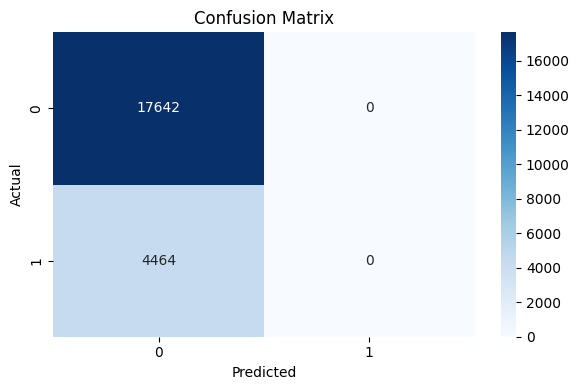

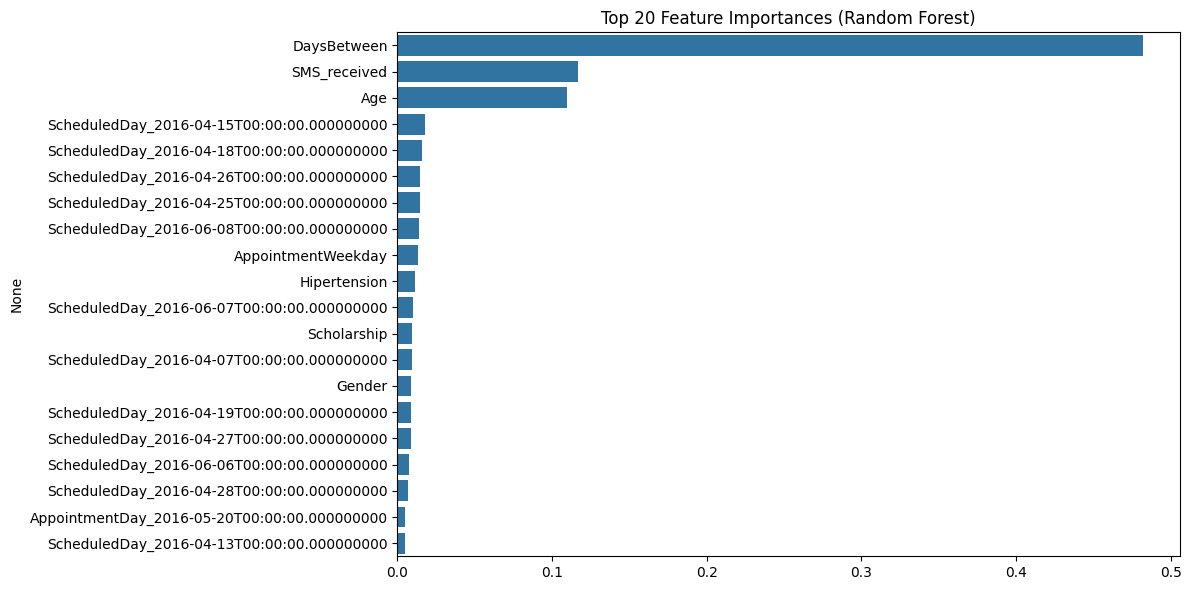

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 150,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #15

n_estimators=250 max_depth=20 min_samples_split=5 min_samples_leaf=4 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17636     6]
 [ 4452    12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.67      0.00      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.73      0.50      0.45     22106
weighted avg       0.77      0.80      0.71     22106

Accuracy on Test Set: 0.7983

Best Parameters (manually set): {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 4}
Cross-Validation Accuracy Scores: [0.79770198 0.79805474 0.79624519 0.79805474 0.79805474]
Mean CV Accuracy: 0.7976


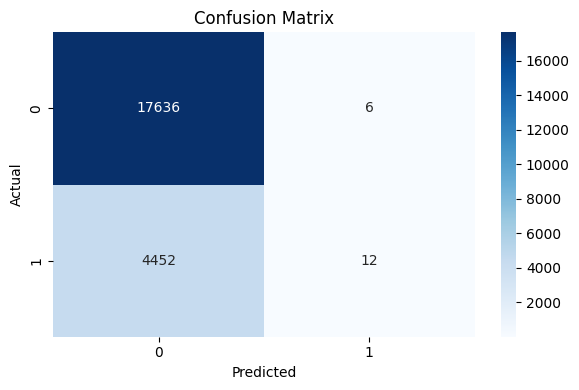

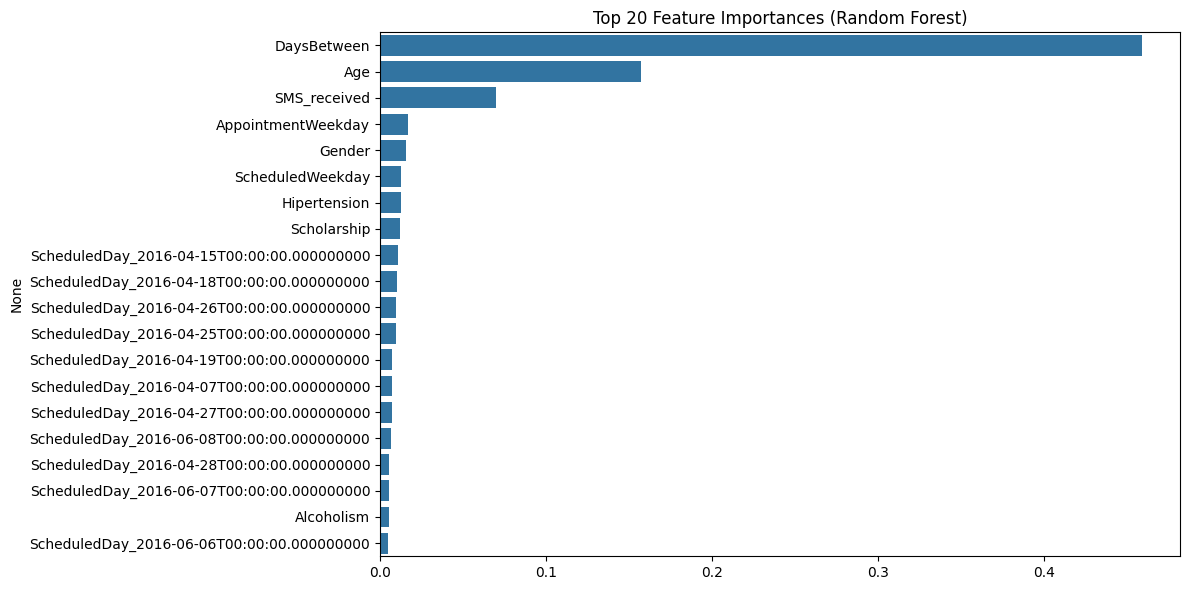

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 250,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 4
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #16

n_estimators=300 max_depth=30 min_samples_split=10 min_samples_leaf=1 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17469   173]
 [ 4293   171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17642
           1       0.50      0.04      0.07      4464

    accuracy                           0.80     22106
   macro avg       0.65      0.51      0.48     22106
weighted avg       0.74      0.80      0.72     22106

Accuracy on Test Set: 0.7980

Best Parameters (manually set): {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 1}
Cross-Validation Accuracy Scores: [0.79449018 0.79416422 0.78552364 0.79398326 0.7980095 ]
Mean CV Accuracy: 0.7932


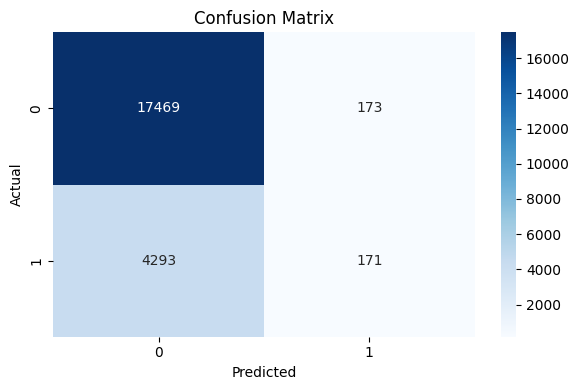

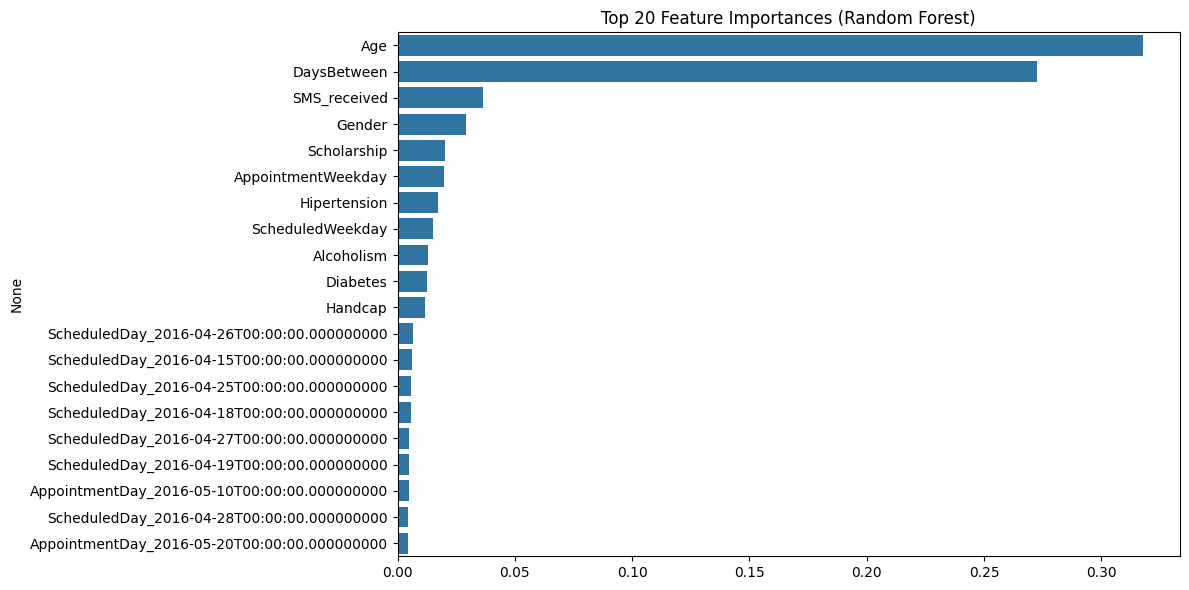

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 300,
    'max_depth': 30,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #17

n_estimators=100 max_depth=20 min_samples_split=10 min_samples_leaf=3 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17632    10]
 [ 4449    15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.60      0.00      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.70      0.50      0.45     22106
weighted avg       0.76      0.80      0.71     22106

Accuracy on Test Set: 0.7983

Best Parameters (manually set): {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 3}
Cross-Validation Accuracy Scores: [0.79770198 0.79782855 0.79610948 0.79787378 0.79805474]
Mean CV Accuracy: 0.7975


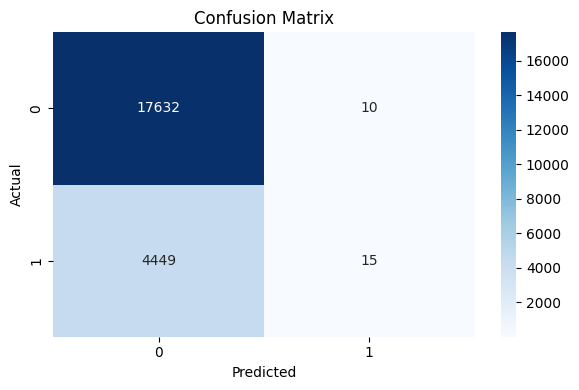

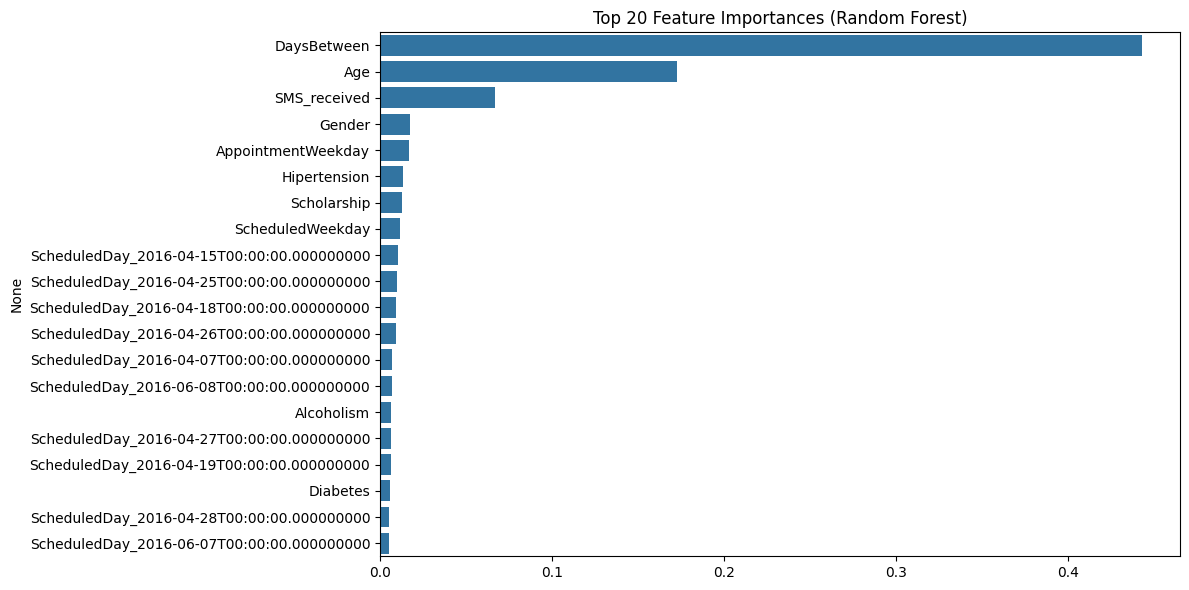

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 10,
    'min_samples_leaf': 3
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #18

 n_estimators=200 max_depth=None min_samples_split=5 min_samples_leaf=5 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17596    46]
 [ 4412    52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.53      0.01      0.02      4464

    accuracy                           0.80     22106
   macro avg       0.67      0.50      0.46     22106
weighted avg       0.75      0.80      0.71     22106

Accuracy on Test Set: 0.7983

Best Parameters (manually set): {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 5}
Cross-Validation Accuracy Scores: [0.79715914 0.79619995 0.79131418 0.79701425 0.79805474]
Mean CV Accuracy: 0.7959


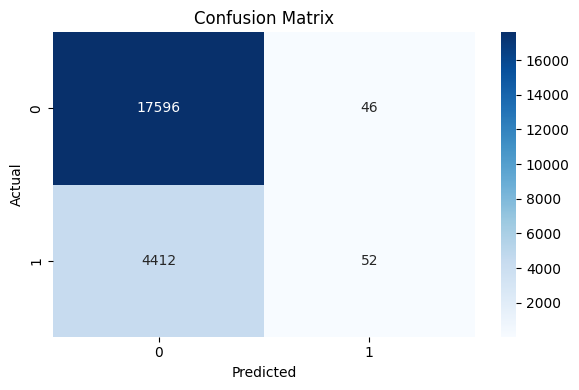

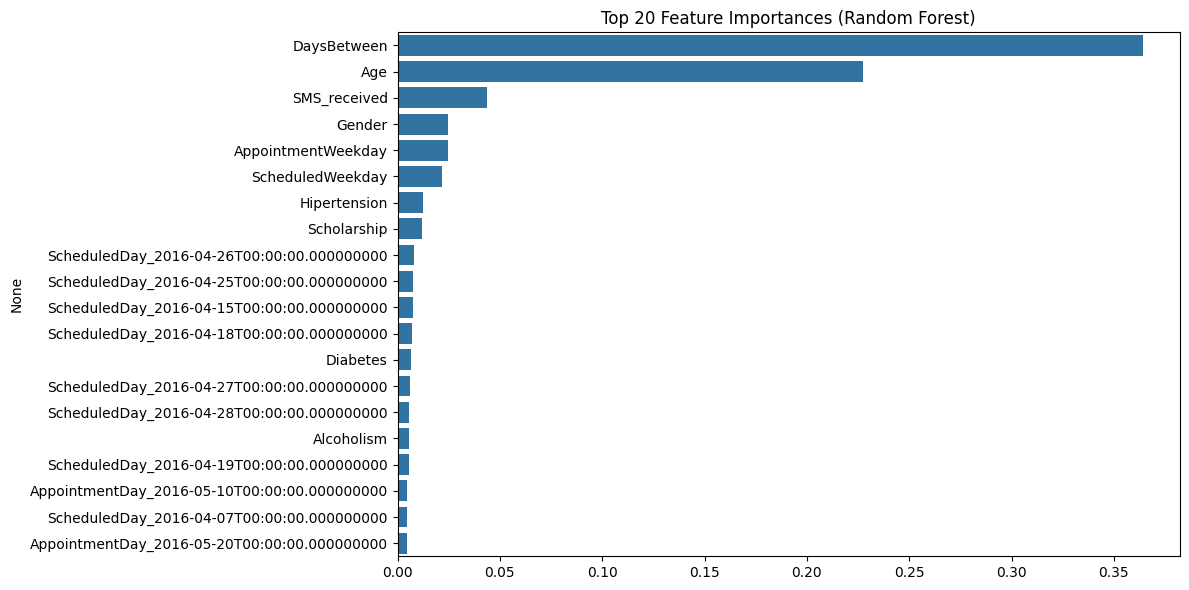

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 5
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #19

 n_estimators=150 max_depth=50 min_samples_split=10 min_samples_leaf=2 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17377   265]
 [ 4229   235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.89     17642
           1       0.47      0.05      0.09      4464

    accuracy                           0.80     22106
   macro avg       0.64      0.52      0.49     22106
weighted avg       0.74      0.80      0.73     22106

Accuracy on Test Set: 0.7967

Best Parameters (manually set): {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 2}
Cross-Validation Accuracy Scores: [0.79277119 0.79371183 0.78226646 0.79172133 0.79819045]
Mean CV Accuracy: 0.7917


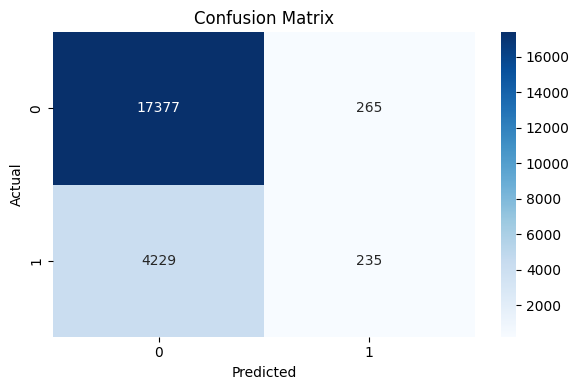

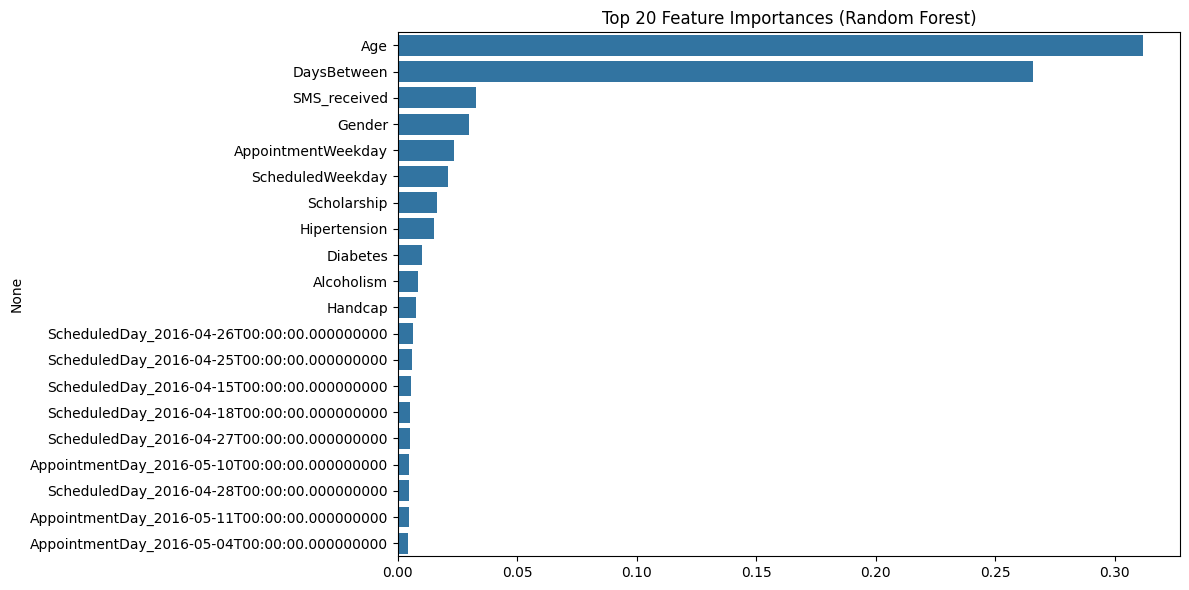

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 150,
    'max_depth': 50,
    'min_samples_split': 10,
    'min_samples_leaf': 2
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #20

n_estimators=100 max_depth=30 min_samples_split=2 min_samples_leaf=1 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17076   566]
 [ 4070   394]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17642
           1       0.41      0.09      0.15      4464

    accuracy                           0.79     22106
   macro avg       0.61      0.53      0.51     22106
weighted avg       0.73      0.79      0.73     22106

Accuracy on Test Set: 0.7903

Best Parameters (manually set): {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1}
Cross-Validation Accuracy Scores: [0.78711662 0.78579507 0.77285682 0.78556888 0.79108799]
Mean CV Accuracy: 0.7845


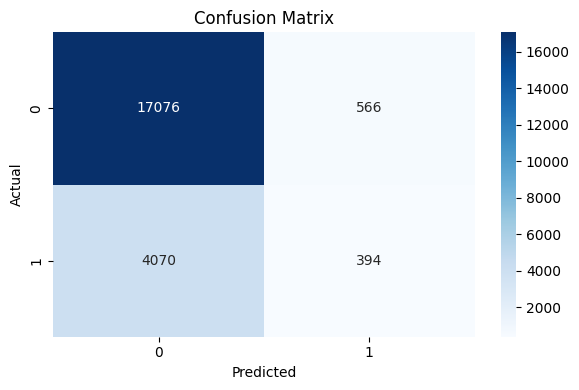

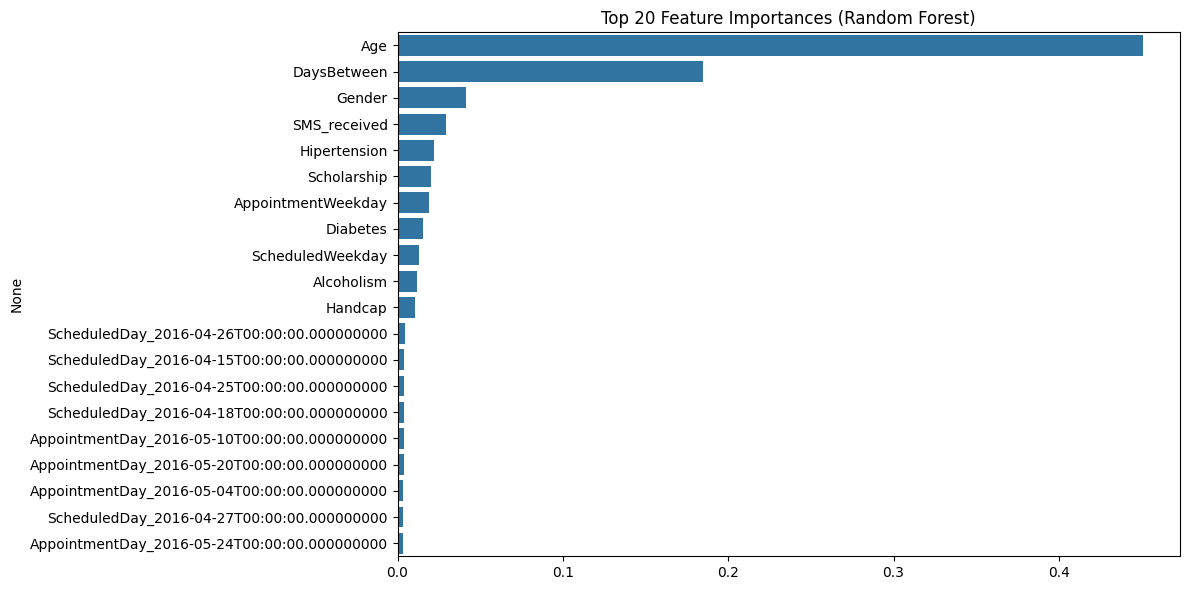

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 100,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Test #21

n_estimators=250 max_depth=10 min_samples_split=5 min_samples_leaf=3 class_weight= balanced

Class distribution in original dataset:
No-show
0    88207
1    22319
Name: count, dtype: int64

Confusion Matrix:
[[17642     0]
 [ 4464     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.00      0.00      0.00      4464

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Accuracy on Test Set: 0.7981

Best Parameters (manually set): {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Accuracy Scores: [0.79806387 0.79809998 0.79805474 0.79805474 0.79805474]
Mean CV Accuracy: 0.7981


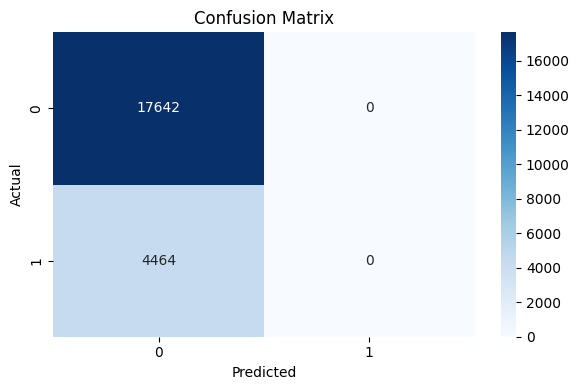

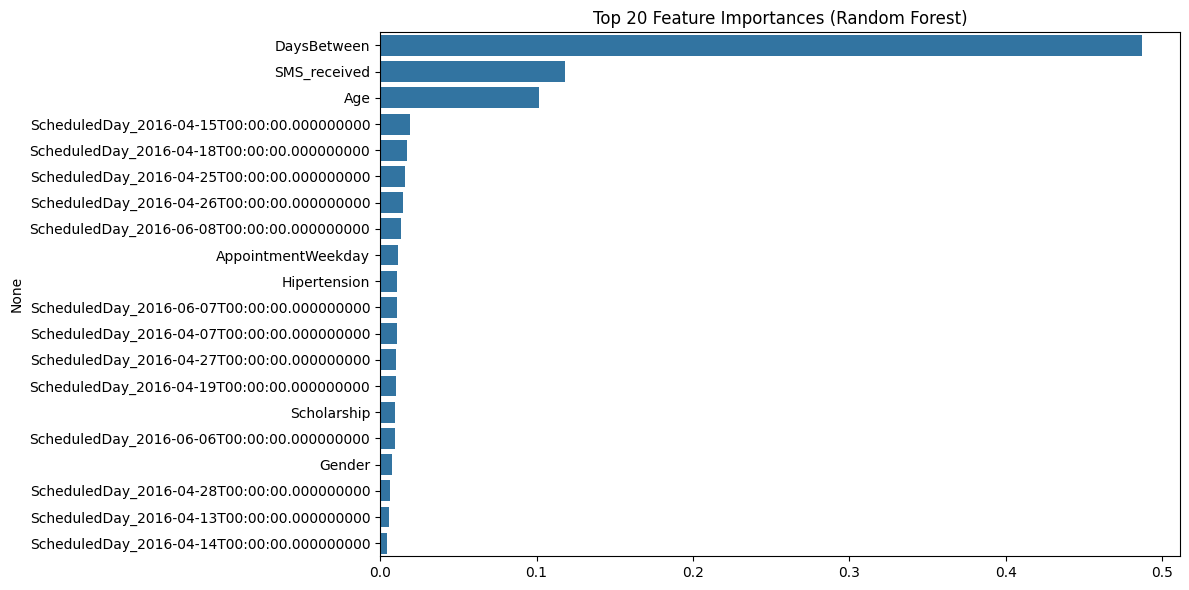

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import shap


df = pd.read_csv("preprocessed_dataset.csv")

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

print("Class distribution in original dataset:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_params = {
    'n_estimators': 250,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 3
}

best_rf = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on Test Set: {:.4f}".format(accuracy_score(y_test, y_pred)))

print("\nBest Parameters (manually set):", best_params)

cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

importances = best_rf.feature_importances_
feat_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:20], y=feat_names[indices][:20])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()